                                 Assignment No. 5

Aim : 
    
1. Logistic Regression
2. Differentiate between Linear and Logistic Regression
3. Sigmoid Function
4. Types of LogisticRegression
5. Confusion Matrix Evaluation Metrics

Code:

In [43]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [44]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [45]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [47]:
print("The shape of the data is: ")
data.shape

The shape of the data is: 


(768, 9)

In [48]:
print(data.isnull().sum())  

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [49]:
X = data.iloc[:,0:13]
y = data.iloc[:,-1]
X
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [47]:
data["Outcome"].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [48]:
x=data.drop(["Outcome"],axis=1)
y=data["Outcome"]

In [49]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [50]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42) 

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 9)
(154, 9)
(614,)
(154,)


In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler

MinMaxScaler()

In [72]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train) 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)


LogisticRegression()

In [79]:
y_pred=logreg.predict(X_test)

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [82]:
model.score(X_test,y_test)

0.6803193862233878

In [83]:
X_train

array([[-1.06239353, -2.68317954,  0.33848384, ..., -0.35316629,
         0.32579632,  0.1943843 ],
       [-0.79047446, -0.07873421, -1.69246463, ...,  1.09419152,
        -0.12578692,  0.05572491],
       [-0.22096417, -0.54561186, -0.57117899, ...,  0.64084286,
        -0.28110029,  1.79768653],
       ...,
       [ 0.84064355,  0.37531604, -0.96697614, ...,  0.42545756,
         0.76041466,  0.78580016],
       [ 0.49403019,  0.63067073,  1.1487657 , ..., -2.84854262,
        -0.37061433,  0.77169871],
       [-0.42018682, -0.24038388,  0.9843224 , ..., -0.99835404,
         0.23421473,  1.55050049]])

In [84]:
y_train

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1])

In [85]:
X_test

array([[ 8.35692112e-01,  5.88465251e-01,  8.65897875e-02,
        -7.96895255e-01,  5.77072127e-01, -3.75120699e-01,
         2.54420843e-01, -1.55677235e-01, -1.12970685e+00,
         5.29804178e-01, -5.75002146e-01,  1.00629281e+00,
         1.16778206e+00,  1.44156862e+00, -5.76891870e-01,
        -1.49518014e-01, -2.47164450e+00, -6.03985187e-01,
        -2.03045386e-01,  3.71145873e-01],
       [ 7.66080278e-01, -2.65461268e+00,  1.49268857e+00,
        -8.26880354e-01, -2.26478892e-01,  2.25661188e+00,
        -7.47211679e-01, -2.71123601e-01,  1.22693322e+00,
        -1.00154076e-01,  2.36867367e+00, -9.98385439e-01,
        -2.13672943e-02, -2.03673750e-01,  3.01791900e-01,
         1.17077461e+00, -8.77982587e-01, -8.03178951e-01,
         3.67365507e-01,  9.13584626e-01],
       [-6.22649362e-01, -1.44723231e+00, -1.50472037e+00,
        -3.70367970e-02, -4.29302225e-01,  1.25896077e+00,
        -1.45755150e+00,  7.60055964e-01,  1.94607455e-01,
        -7.42470586e-01,  1.2

In [86]:
y_test

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0])

In [96]:
from sklearn.metrics import precision_score,ConfusionMatrixDisplay, confusion_matrix,accuracy_score,recall_score,classification_report
cm= confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
print("Confusion matrix :")
print(cm)

Confusion matrix :
[[15  0]
 [ 0 10]]


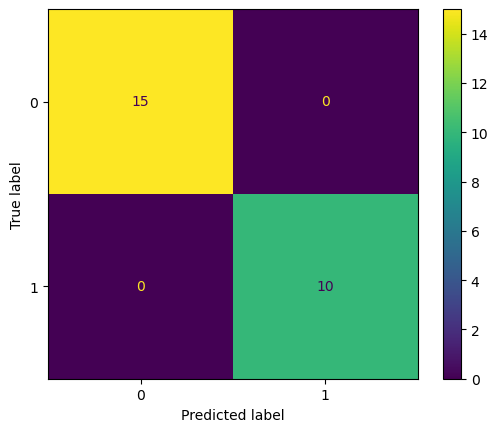

In [97]:
disp.plot()

In [98]:
true_negative =cm[0][0]
false_negative =cm[1][0]
false_positive =cm[0][1]
true_positive =cm[1][1]

In [99]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + true_negative + false_negative)
Accuracy
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

1.0

In [100]:
print("Accuracy:", Accuracy)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
[[15  0]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [102]:
Accuracy

1.0

In [103]:
Precision

1.0

In [104]:
Recall

1.0

In [105]:
F1_Score

1.0

In [116]:
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib as plt

In [117]:
auc_score=roc_auc_score(y_test,y_pred)

In [118]:
fpr,tpr,threasholds=roc_curve(y_test,y_pred)

In [119]:
threasholds

array([2, 1, 0])

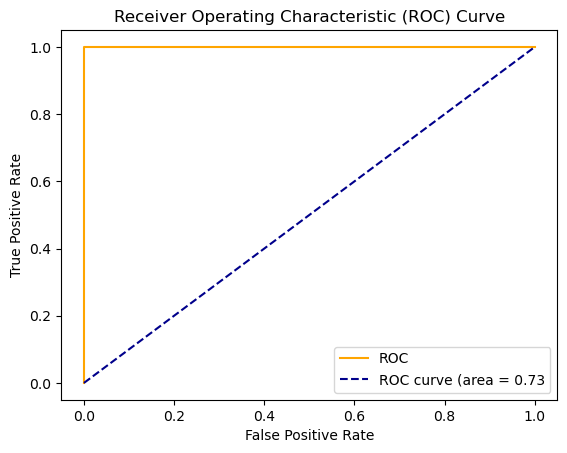

In [124]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = 0.73')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

<Axes: >

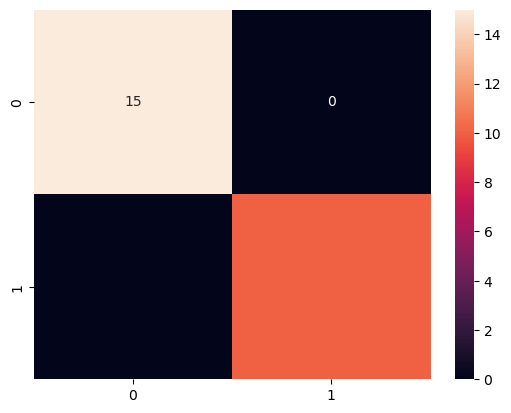

In [125]:
import seaborn as sns
sns.heatmap(cm, annot=True)

Name : Mohan Kadambande 
    
Roll No. : 13212 (TECO-b1)